In [1]:
import matplotlib.pyplot as plt 
import numpy as np
from keras.layers import Dense

In [2]:
from tensorflow.keras import Sequential

In [3]:
x = np.random.uniform(-20,20,10000)

In [4]:
x.min()

-19.998593476308507

In [5]:
x

array([ -4.78280135,   4.24691284,   7.23818739, ...,  10.66768647,
       -13.16266366,   2.91651899])

In [6]:
x.shape

(10000,)

In [7]:
type(x)

numpy.ndarray

In [133]:
def make_equation(x):
    return 7*x*x*x -12*x*x -22*x + 7

In [8]:
y= 7*x*x*x -12*x*x -22*x + 7

# 7 * x**3 - 12 * x**2 - 22 * x + 7

In [113]:
y = make_equation(x)

In [9]:
y.shape

(10000,)

In [136]:
y

array([ 3.66707772e+04, -2.99555389e+04, -3.58524757e+00, ...,
       -1.51030521e+04, -1.58407247e+04, -4.79046585e+00])

In [10]:
x_data = (2 * (x - np.min(x)) / (np.max(x) - np.min(x))) - 1
y_data = (2 * (y - np.min(y)) / (np.max(y) - np.min(y))) - 1

In [138]:
x_data

array([ 0.90099185, -0.78744939,  0.02051122, ..., -0.62280588,
       -0.63307848,  0.13287663])

In [11]:
size = len(x_data)
size

10000

In [141]:
from sklearn.model_selection import train_test_split


In [162]:
x_train, x_temp, y_train, y_temp = train_test_split(x_data, y_data, test_size=0.30, random_state=42)

In [163]:
x_train.shape

(7000,)

In [164]:
x_temp.shape

(3000,)

In [168]:
x_validation, x_test, y_validation, y_test = train_test_split(x_temp, x_temp, test_size=0.67, random_state=53)

In [169]:
x_validation.shape

(989,)

In [167]:
x_test.shape

(2011,)

In [170]:
x_train.shape

(7000,)

In [171]:
x_data.shape

(10000,)

In [172]:
size = len(x_data)
size

10000

In [14]:

x_train, y_train = x_data[: int(size * 0.68)] , y_data[: int(size * 0.68)]
x_validation, y_validation = x_data[int(size * 0.68) : int(size * 0.93)] , y_data[int(size * 0.68) : int(size * 0.93)]
x_test , y_test = x_data[int(size * 0.93) :] , y_data[int(size * 0.93) :]

In [96]:
x_test.shape

(500,)

In [175]:
type(x_train)

numpy.ndarray

In [177]:
x_train.shape

(6800,)

In [16]:
model = Sequential([
    Dense(32, activation='relu',input_shape=(1,)),
    Dense(64, activation='relu'),
    Dense(100, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])

In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │         6,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        12,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,733 (84.89 KB)

 Trainable params: 21,733 (84.89 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
import tensorflow as tf

In [19]:
model.compile(optimizer = "adam", loss = "mean_squared_error", metrics = [tf.keras.metrics.R2Score(name = "accuracy")])


In [30]:
x_train.shape


(6800,)

In [34]:
history = model.fit(x_train,y_train,epochs=5, batch_size=128,validation_data=(x_validation, y_validation))


Epoch 1/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 1.0000 - loss: 6.7245e-07 - val_accuracy: 1.0000 - val_loss: 4.1330e-07
Epoch 2/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 2.7890e-07 - val_accuracy: 1.0000 - val_loss: 2.6357e-07
Epoch 3/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 3.2651e-07 - val_accuracy: 1.0000 - val_loss: 2.3201e-07
Epoch 4/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 2.4280e-07 - val_accuracy: 1.0000 - val_loss: 2.2996e-07
Epoch 5/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 2.2108e-07 - val_accuracy: 1.0000 - val_loss: 2.9176e-07


In [21]:
history

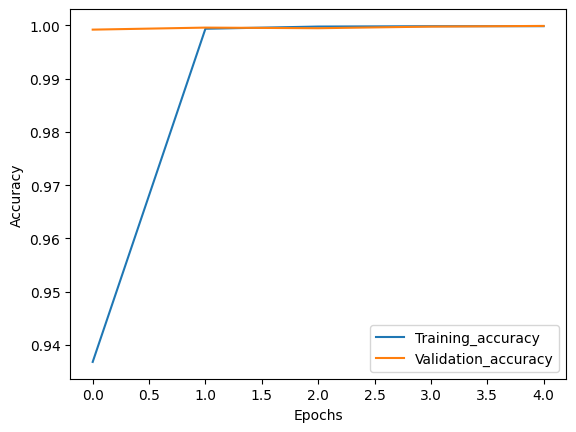

In [24]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.legend(["Training_accuracy", "Validation_accuracy"])

plt.show()

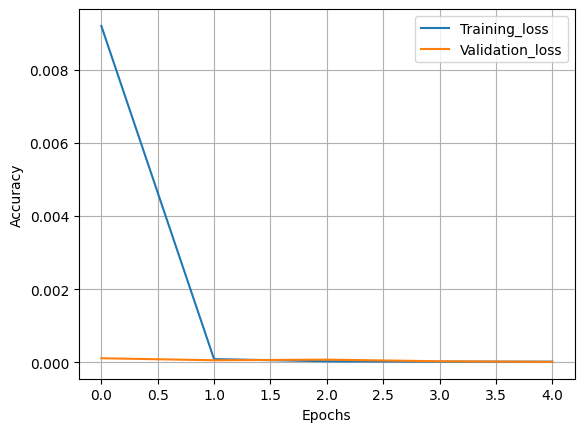

In [25]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Training_loss", "Validation_loss"])
plt.grid()
plt.show()

In [26]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9999 - loss: 1.1191e-05


In [29]:
print(f"Test Loss: {test_loss :.10f}")
print(f"Test Accuracy: {test_accuracy*100 :.5f}%")

Test Loss: 0.0000122105
Test Accuracy: 99.98993%
